# Function Fitting

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()

## load data

In [2]:
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index13.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

Training data set: (300, 22832)


In [3]:
## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data

## make folder for each function

In [ ]:
dcp.make_folders("Figs/curve_fitting/")

## exponential fit

### Two parameters

#### train on 15 attempts

In [ ]:
dcp.make_folders("Figs/curve_fitting/exponential2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    ## train
    exp2_opt, exp2_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed, 
        "Figs/curve_fitting/exponential2/{0}".format(i+1), clt_num = i+1)
    ## validation
    y_fit = cv.exponential_curve2(attempts300, exp2_opt[0], exp2_opt[1])
    
    exp2_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/exponential2/valid{0}".format(i), 
              clt_num=i+1, cost = exp2_cost300)

### Three parameters

#### train on 15 attempts

In [ ]:
dcp.make_folders("Figs/curve_fitting/exponential3")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    exp3_opt, exp3_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/exponential3/{0}".format(i+1), clt_num = i+1)

    y_fit = cv.exponential_curve3(attempts300, exp3_opt[0], exp3_opt[1], exp3_opt[2])
    exp3_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    cost300 = cv.cost_Function(attempts300, y_fit)
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/exponential3/valid{0}".format(i), 
              clt_num=i+1, cost = exp3_cost300)

### polynoimial fit

In [ ]:
dcp.make_folders("Figs/curve_fitting/polynomial2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    poly_opt, poly_cost = cv.curve_Fitting(
        cv.polynomial_least, cv.polynomial_curve, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/polynomial2/{0}".format(i+1), clt_num = i+1)

    y_fit = cv.polynomial_curve(attempts300, poly_opt[0], poly_opt[1])
    
    poly_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/polynomial2/valid{0}".format(i), 
              clt_num=i+1, cost = poly_cost300)

### power law fit

#### Two parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl2_opt, pl2_cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw2/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve2(attempts300, pl2_opt[0], pl2_opt[1])
    pl2_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/powerlaw2/valid{0}".format(i), 
              clt_num=i+1, cost = pl2_cost300)

#### Thress parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw3")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl3_opt, pl3_cost = cv.curve_Fitting(
        cv.powerlaw_least3, cv.powerlaw_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw3/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve3(attempts300, pl3_opt[0], pl3_opt[1], pl3_opt[2])
    pl3_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/powerlaw3/valid{0}".format(i), 
              clt_num=i+1, cost = pl3_cost300)

#### Four parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw4")

seed = [1, 1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl4_opt, pl4_cost = cv.curve_Fitting(
        cv.powerlaw_least4, cv.powerlaw_curve4, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw4/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve4(attempts300, pl4_opt[0], pl4_opt[1], pl4_opt[2], pl4_opt[3])
    pl4_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/powerlaw4/valid{0}".format(i), 
              clt_num=i+1, cost = pl4_cost300)

## Multiple curves

### exponential with three parameter

In [ ]:
seed = [1, 1, 1]

for clt_num in range(13):
    idx, cost, p1, p2 = cv.multi_Fitting2(cv.exponential_least3, clt_num, 
                                     eval("avg{0}".format(clt_num+1)), seed, n_param=3)
    
    y_mean1 = cv.exponential_curve3(attempts300, p1[0], p1[1], p1[2])
    y_mean2 = cv.exponential_curve3(attempts300, p2[0], p2[1], p2[2])
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    ax.plot(attempts300, avg11, 'rx', label='average score')
    ax.plot(attempts300[:idx], y_mean1[:idx], 'b-', label='curve 1', linewidth=3)
    ax.plot(attempts300[idx-50:], y_mean2[idx-50:], 'g-', label='curve 2', linewidth=3)
    
    ax.set_ylim([0, max(avg11)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num+1, round(cost, 2)))
    
    plt.show()
    
'''
y_mean1 = cv.powerlaw_curve4(attempts300, param1[0], param1[1], param1[2], param1[3])
y_mean2 = cv.powerlaw_curve4(attempts300, param2[0], param2[1], param2[2], param2[3])
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
'''
#ax.set_xlim([0, max()+1])

#fig.savefig(file_path, dpi=100)


In [ ]:
seed = [1, 1, 1]
idx1, idx2, cost, p1, p2, p3 = cv.multi_curveFitting_3(cv.exponential_least3, avg11, seed, n_param=3)

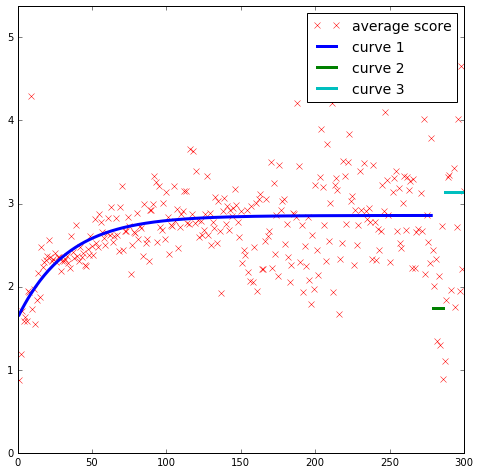

278 8


In [11]:
y_mean1 = cv.exponential_curve3(attempts300, p1[0], p1[1], p1[2])
y_mean2 = cv.exponential_curve3(attempts300, p2[0], p2[1], p2[2])
y_mean3 = cv.exponential_curve3(attempts300, p3[0], p3[1], p3[2])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(attempts300, avg11, 'rx', label='average score')
ax.plot(attempts300[:idx1], y_mean1[:idx1], 'b-', label='curve 1', linewidth=3)
ax.plot(attempts300[idx1:idx1+idx2], y_mean2[idx1:idx1+idx2], 'g-', label='curve 2', linewidth=3)
ax.plot(attempts300[idx1+idx2:], y_mean3[idx1+idx2:], 'c-', label='curve 3', linewidth=3)

ax.set_ylim([0, max(avg11)+0.2])
ax.legend(fontsize=14)
#ax.set_title("cluster {0}: cost {1}".format(clt_num+1, round(cost, 2)))

plt.show()

print(idx1, idx2)

In [5]:
def multi_curveFitting_3(least_func, avg, seed, n_param=2):
    cost = []
    idx_mid2 = [] # save idx2(second change)
    x_range = np.linspace(1, 300, 300)
    
    param1 = np.ones((n_param, 300))*np.nan
    param2 = np.ones((n_param, 300, 300))*np.nan
    param3 = np.ones((n_param, 300, 300))*np.nan
    
    for n1 in range(300): # iteration for all data
        print("iter ", n1)
        x1 = x_range[:n1+1]
        y1 = avg[:n1+1]

        lsq1 = least_squares(least_func, seed, args=(x1, y1))
        cost1 = lsq1.cost
        param1[:, n1] = lsq1.x 
        
        cost_remain = []        
        for n2 in range(300-n1):
            x2 = x_range[n1+1:n2+n1+2]
            x3 = x_range[n1+n2+2:]
            # print("x1:{0}, x2:{1}, x3:{2}".format(x1, x2, x3))

            y2 = avg[n1+1:n1+n2+2]
            y3 = avg[n1+n2+2:]
            
            lsq2 = least_squares(least_func, seed, args=(x2, y2))
            lsq3 = least_squares(least_func, seed, args=(x3, y3))
    
            cost_remain.append(lsq2.cost+lsq3.cost)

            param2[:, n1, n2] = lsq2.x
            param3[:, n1, n2] = lsq3.x
    
        idx2 = np.argmin(cost_remain)
        idx_mid2.append(idx2)
        cost.append(cost1+cost_remain[idx2])
    
    idx1 = np.argmin(cost)
    idx2 = idx_mid2[idx1]
    
    return idx1, idx2, cost[idx1], param1[:, idx1], param2[:, idx1, idx2], param3[:, idx1, idx2]

seed = [1, 1, 1]
idx1, idx2, cost, p1, p2, p3 = multi_curveFitting_3(cv.exponential_least3, avg11, seed, n_param=3)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
iter  11
iter  12
iter  13
iter  14
iter  15
iter  16
iter  17
iter  18
iter  19
iter  20
iter  21
iter  22
iter  23
iter  24
iter  25
iter  26
iter  27
iter  28
iter  29
iter  30
iter  31
iter  32
iter  33
iter  34
iter  35
iter  36
iter  37
iter  38
iter  39
iter  40
iter  41
iter  42
iter  43
iter  44
iter  45
iter  46
iter  47
iter  48
iter  49
iter  50
iter  51
iter  52
iter  53
iter  54
iter  55
iter  56
iter  57
iter  58
iter  59
iter  60
iter  61
iter  62
iter  63
iter  64
iter  65
iter  66
iter  67
iter  68
iter  69
iter  70
iter  71
iter  72
iter  73
iter  74
iter  75
iter  76
iter  77
iter  78
iter  79
iter  80
iter  81
iter  82
iter  83
iter  84
iter  85
iter  86
iter  87
iter  88
iter  89
iter  90
iter  91
iter  92
iter  93
iter  94
iter  95
iter  96
iter  97
iter  98
iter  99
iter  100
iter  101
iter  102
iter  103
iter  104
iter  105
iter  106
iter  107
iter  108
iter  109
iter  110
